Enter the mean: 59.3
Enter the stdev: 13.1/sqrt(35)
Enter the decimal place (e.g., 4 for 4 decimal places): 4
Choose calculation option:
1. Find x for a given left probability
2. Find x for a given right probability
3. Find x for given lower and upper probabilities
Enter your choice (1/2/3): 2
Enter the right probability (p): .10
X for P(X > x) = 0.1 is 62.1377


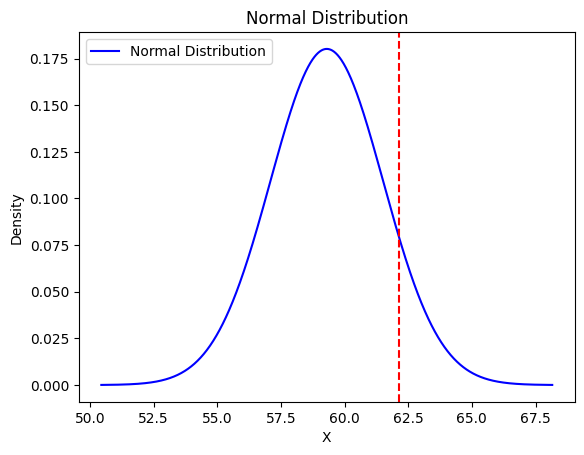


Professor: Edward Pineda-Castro
Department of Mathematics
Los Angeles City College


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sympy as sp

def evaluate_expression(expr):
    return float(sp.sympify(expr))

def get_user_input():
    mean = float(input("Enter the mean: "))
    sd = input("Enter the stdev: ")
    sd = evaluate_expression(sd)  # Evaluate the mathematical expression
    decimal = int(input("Enter the decimal place (e.g., 4 for 4 decimal places): "))
    return mean, sd, decimal

def inverse_left(p, mean, sd, decimal):
    return round(stats.norm.ppf(p, mean, sd), decimal)

def inverse_right(p, mean, sd, decimal):
    return round(stats.norm.ppf(1 - p, mean, sd), decimal)

def inverse_between(a, b, mean, sd, decimal):
    lower = round(stats.norm.ppf(a, mean, sd), decimal)
    upper = round(stats.norm.ppf(b, mean, sd), decimal)
    return lower, upper

def plot_normal_distribution(mean, sd, result=None, bounds=None):
    x = np.linspace(mean - 4 * sd, mean + 4 * sd, 1000)
    y = stats.norm.pdf(x, mean, sd)
    plt.plot(x, y, label="Normal Distribution", color='blue')

    if result is not None:
        plt.axvline(result, color='red', linestyle='--')

    if bounds is not None:
        plt.axvline(bounds[0], color='red', linestyle='--')
        plt.axvline(bounds[1], color='red', linestyle='--')

    plt.xlabel("X")
    plt.ylabel("Density")
    plt.title("Normal Distribution")
    plt.legend()
    plt.show()

def inverse_normal_distribution_calculator():
    mean, sd, decimal = get_user_input()

    print("Choose calculation option:")
    print("1. Find x for a given left probability")
    print("2. Find x for a given right probability")
    print("3. Find x for given lower and upper probabilities")

    option = int(input("Enter your choice (1/2/3): "))

    if option == 1:
        p = float(input("Enter the left probability (p): "))
        result = inverse_left(p, mean, sd, decimal)
        print(f"X for P(X < x) = {p} is {result}")
        plot_normal_distribution(mean, sd, result=result)

    elif option == 2:
        p = float(input("Enter the right probability (p): "))
        result = inverse_right(p, mean, sd, decimal)
        print(f"X for P(X > x) = {p} is {result}")
        plot_normal_distribution(mean, sd, result=result)

    elif option == 3:
        a = float(input("Enter the lower probability (a): "))
        b = float(input("Enter the upper probability (b): "))
        lower, upper = inverse_between(a, b, mean, sd, decimal)
        print(f"X values for P({a} < X < {b}) are {lower} and {upper}")
        plot_normal_distribution(mean, sd, bounds=(lower, upper))

    else:
        print("Invalid choice. Please select 1, 2, or 3.")

    # Print professor info at the bottom
    print("\nProfessor: Edward Pineda-Castro")
    print("Department of Mathematics")
    print("Los Angeles City College")

if __name__ == "__main__":
    inverse_normal_distribution_calculator()

